# Assignment 3 - Heap Search
### Miles Tweed

Heap search first requires a max heap which in turn requires the max-heapify function

### Import Statements

In [199]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np

#### Max Heapify

In [1]:
def max_heapify(A, stop, n = 0, i = 0):
    '''
    INPUT:  (A)    - a list,
            (stop) - an index position indicating how much of the list to max_heapify,
            (n)    - a passthrough step counting variable,
            (i)    - an index position indicating where to begin to heapify
    RETURN: (n)    - a step count
    '''
    largest = i
    left_arg = 2*i + 1
    right_arg = 2*i + 2
    n+=4                                                        # assign variables and check if
    if left_arg < stop:
        n+=1                                                    # check if
        if left_arg < (stop) and A[left_arg] > A[i]:
            n+=1                                                # assign largest
            largest = left_arg
        else:
            n+=1                                                # assign largest
            largest = i 
    
    n+=1                                                        # check if
    if right_arg < stop:
        n+=1                                                    # check if
        if right_arg < (stop) and A[right_arg] > A[largest]:
            n+=1.                                               # assign largest
            largest = right_arg
    n+=1                                                        # check if
    if largest != i:
        n+=1                                                    # make switch
        A[i], A[largest] = A[largest], A[i]
        max_heapify(A,stop = stop,n=n, i=largest)

    return n

#### Build Max Heap

In [2]:
def build_max_heap(A, n=0):
    '''
    INPUT:  (A)    - a list,
            (n)    - a passthrough step counting variable
    RETURN: (n)    - a step count
    '''
    x = len(A)
    n+= 1                                           # assign x
    for i in range(int(x/2), -1, -1):
        n+=1                                        # assign i
        max_heapify(A,stop=len(A), n=n ,i=i)
    return n

#### Heap Sort

In [3]:
def heap_sort(A, n = 0):
    '''
    INPUT:  (A)    - a list,
            (n)    - a passthrough step counting variable
    RETURN: (n)    - a step count
    '''
    n += build_max_heap(A)
    for i in range((len(A)-1),1, -1):
        n+= 2                                      # assign i and make switch
        A[0], A[i] = A[i], A[0]
        max_heapify(A, stop=(i-1), n=n)
    return n

## Initial Test

To test the functionality of heap sort an unordered list A is created

In [4]:
A = [2, 10, 5, 8, 4, 5, 1, 6, 7]

Passing the list into heap sort return the number of steps it too to sort the list

In [5]:
heap_sort(A)

20

The list has been properly sorted

In [6]:
A

[1, 2, 4, 5, 5, 6, 7, 8, 10]

## Run Time Tests
The following code averages out the step counts for 1000 random lists ranging in size from 20 to 800.

In [192]:
averages = {}
for i in range(1,41):
    test_list = [[randint(1,100) for x in range((i*20))] for x in range(1000)]
    step_counts = []
    for j in range(1000):
        step_counts.append(heap_sort(test_list[j]))
    averages['{}'.format(i*20)] = sum(step_counts)/1000
averages

{'20': 48.0,
 '40': 98.0,
 '60': 148.0,
 '80': 198.0,
 '100': 248.0,
 '120': 298.0,
 '140': 348.0,
 '160': 398.0,
 '180': 448.0,
 '200': 498.0,
 '220': 548.0,
 '240': 598.0,
 '260': 648.0,
 '280': 698.0,
 '300': 748.0,
 '320': 798.0,
 '340': 848.0,
 '360': 898.0,
 '380': 948.0,
 '400': 998.0,
 '420': 1048.0,
 '440': 1098.0,
 '460': 1148.0,
 '480': 1198.0,
 '500': 1248.0,
 '520': 1298.0,
 '540': 1348.0,
 '560': 1398.0,
 '580': 1448.0,
 '600': 1498.0,
 '620': 1548.0,
 '640': 1598.0,
 '660': 1648.0,
 '680': 1698.0,
 '700': 1748.0,
 '720': 1798.0,
 '740': 1848.0,
 '760': 1898.0,
 '780': 1948.0,
 '800': 1998.0}

## Plotting and Thoretical Comparison

The worst case runtime of heap sort should be on the order of $\text{O}(n\log_2{n})$. The run time from the test will be plotted against this function as well as the function $y=x$.

In [208]:
X = np.linspace(20,800,40)
f = [x*np.log2(x) for x in X]

This converts the keys to a list of integers.

In [209]:
list_length = [int(x) for x in list(averages.keys())]

The graph shows that heap sort ran better than the theoretical runtime of $n\log_2(n)$

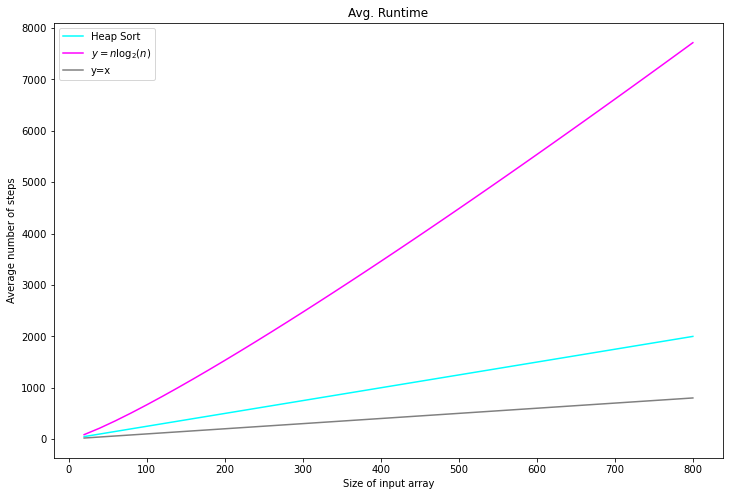

In [210]:
plt.figure(figsize = (12,8))
plt.plot(list_length, list(averages.values()), color = 'cyan', label = 'Heap Sort')
plt.plot(X,f, color = 'magenta', label = '$y=n\log_2(n)$')
plt.plot(X,X, color = 'grey', label = 'y=x')
plt.yscale('linear')
plt.legend()
plt.title('Avg. Runtime')
plt.ylabel('Average number of steps')
plt.xlabel('Size of input array')
plt.savefig('average_runtime_plot.pdf')